## Tarea 3: Estadística Básica

**Tarea en Clase**
- 1.1 Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin usar librerias)
- 1.2 Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

**Tarea**

- 1.1 Calcula estadísticos descriptivos básicos para tus datos
- 1.2 Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma
- 1.3 Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación
- 1.4 Presenta tus resultados gráficamente

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [19]:
# lectura de datos
df = pd.read_csv('C:/Users/emanuel.novelo/Desktop/MCD - 2024-2026/ML - 2do Tetra/MCD----ML----2024/data/CO2_emission.csv')
df.head()

,Model_Year,Make,Model,Vehicle_Class,Engine_Size,Cylinders,Transmission,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
0,2021,Acura,ILX,Compact,2.4,4,AM8,9.9,7.0,8.6,199,3
1,2021,Acura,NSX,Two-seater,3.5,6,AM9,11.1,10.8,11.0,256,3
2,2021,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,11.0,8.6,9.9,232,6
3,2021,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,11.3,9.1,10.3,242,6
4,2021,Acura,TLX SH-AWD,Compact,2.0,4,AS10,11.2,8.0,9.8,230,7


#### Tarea en clase 1.1

In [11]:
# Funciones: Medidas de tendencia central y dispersión
def media(datos):
    return sum(datos) / len(datos)

def mediana(datos):
    datos_ordenados = sorted(datos)
    n = len(datos)
    mitad = n // 2

    if n % 2 == 0:
        return (datos_ordenados[mitad - 1] + datos_ordenados[mitad]) / 2
    else:
        return datos_ordenados[mitad]

def moda(datos):
    frecuencia = {}
    for dato in datos:
        if dato in frecuencia:
            frecuencia[dato] += 1
        else:
            frecuencia[dato] = 1
    moda_valor = max(frecuencia, key=frecuencia.get)
    return moda_valor

def varianza(datos):
    promedio = media(datos)
    sumatoria = sum((x - promedio) ** 2 for x in datos)
    return sumatoria / len(datos)

def desviacion_estandar(datos):
    return varianza(datos) ** 0.5

def rango(datos):
    return max(datos) - min(datos)

def percentil(datos, percentil):
    datos_ordenados = sorted(datos)
    k = (len(datos) - 1) * percentil / 100
    f = int(k)
    c = k - f

    if f + 1 < len(datos):
        return datos_ordenados[f] + c * (datos_ordenados[f + 1] - datos_ordenados[f])
    else:
        return datos_ordenados[f]

def coeficiente_variacion(datos):
    return (desviacion_estandar(datos) / media(datos)) * 100


In [12]:
# Analizando medidas de tendencia central y dispersión en las variables: 
# Emision de CO2 & Fuel consumption
datos_emision_CO2 = df['CO2_Emissions']
datos_consumo_comb = df['Fuel_Consumption_comb(L/100km)']

# Aplicando medidas de tendencia y dispersión en columna "CO2_Emissions"
print("Medidas para CO2_Emissions:")
print("Media:", media(datos_emision_CO2))
print("Mediana:", mediana(datos_emision_CO2))
print("Moda:", moda(datos_emision_CO2))
print("Varianza:", varianza(datos_emision_CO2))
print("Desviación Estándar:", desviacion_estandar(datos_emision_CO2))
print("Rango:", rango(datos_emision_CO2))
print("Percentil 75:", percentil(datos_emision_CO2, 75))
print("Coeficiente de Variación:", coeficiente_variacion(datos_emision_CO2))

# Aplicando medidas de tendencia y dispersión en columna "Fuel_Consumption_comb(L/100km)"
print("\nMedidas para Fuel_Consumption_comb(L/100km):")
print("Media:", media(datos_consumo_comb))
print("Mediana:", mediana(datos_consumo_comb))
print("Moda:", moda(datos_consumo_comb))
print("Varianza:", varianza(datos_consumo_comb))
print("Desviación Estándar:", desviacion_estandar(datos_consumo_comb))
print("Rango:", rango(datos_consumo_comb))
print("Percentil 75:", percentil(datos_consumo_comb, 75))
print("Coeficiente de Variación:", coeficiente_variacion(datos_consumo_comb))

Medidas para CO2_Emissions:
Media: 258.52941176470586
Mediana: 255
Moda: 242
Varianza: 4148.428814092488
Desviación Estándar: 64.40829771149436
Rango: 514
Percentil 75: 303.5
Coeficiente de Variación: 24.91333472344492

Medidas para Fuel_Consumption_comb(L/100km):
Media: 11.060213903743326
Mediana: 10.7
Moda: 13.8
Varianza: 8.211058777774593
Desviación Estándar: 2.865494508418153
Rango: 22.1
Percentil 75: 13.1
Coeficiente de Variación: 25.908129203977936


#### Tarea en clase 1.1 & Tarea 1.3

Visualización y pruebas para CO2_Emissions:


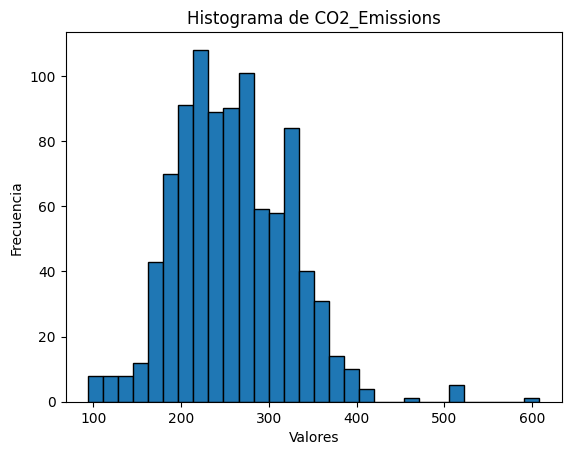

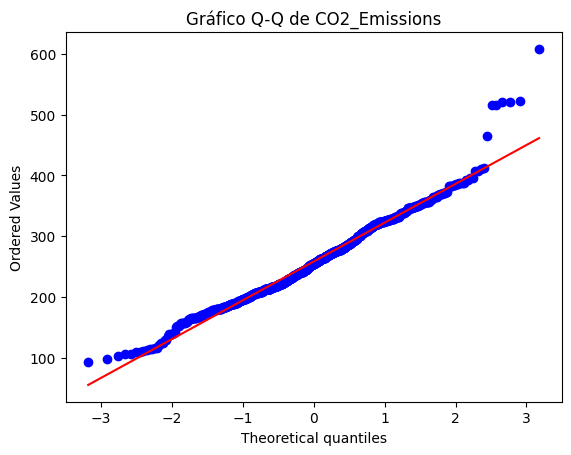

Prueba de Shapiro-Wilk: (0.9773217439651489, 6.851678946429018e-11)
Prueba de Kolmogorov-Smirnov: (0.04410692306442371, 0.051050834763590625)
Prueba de Anderson-Darling: (2.723331084459801, array([0.574, 0.653, 0.784, 0.914, 1.087]), array([15. , 10. ,  5. ,  2.5,  1. ]))

Visualización y pruebas para Fuel_Consumption_comb(L/100km):


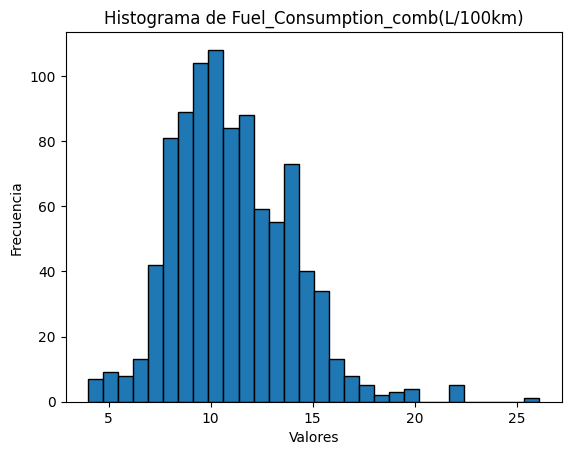

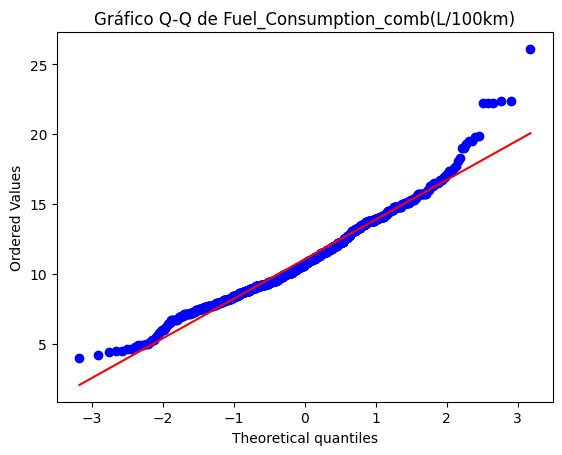

Prueba de Shapiro-Wilk: (0.9723669290542603, 2.4722808435878596e-12)
Prueba de Kolmogorov-Smirnov: (0.057961390124639856, 0.0035848439835974156)
Prueba de Anderson-Darling: (4.775062991574032, array([0.574, 0.653, 0.784, 0.914, 1.087]), array([15. , 10. ,  5. ,  2.5,  1. ]))


In [13]:
# Comprobando si las variables de interés son datos paramétricos o no paramétricos
# Especificamente respecto a la distribución Normal
# Se evaluará gráficamente y a través de pruebas de hipótesis si los datos de Emisiones de CO2 y de Consumo...
# de combustible siguen una distribución Normal

datos_emision_CO2 = df['CO2_Emissions']
datos_consumo_comb = df['Fuel_Consumption_comb(L/100km)']

# Histograma
def plot_histograma(datos, titulo):
    plt.hist(datos, bins=30, edgecolor='black')
    plt.title(titulo)
    plt.xlabel('Valores')
    plt.ylabel('Frecuencia')
    plt.show()

# Gráfico Q-Q
def plot_qq(datos, titulo):
    stats.probplot(datos, dist="norm", plot=plt)
    plt.title(titulo)
    plt.show()

# Prueba de Shapiro-Wilk
def prueba_shapiro(datos):
    estadistico, p_valor = stats.shapiro(datos)
    return estadistico, p_valor

# Prueba de Kolmogorov-Smirnov
def prueba_ks(datos):
    estadistico, p_valor = stats.kstest(datos, 'norm', args=(np.mean(datos), np.std(datos)))
    return estadistico, p_valor

# Prueba de Anderson-Darling
def prueba_anderson(datos):
    resultado = stats.anderson(datos, dist='norm')
    return resultado.statistic, resultado.critical_values, resultado.significance_level

# Aplicando pruebas paramétricas para evaluar Normalidad
print("Visualización y pruebas para CO2_Emissions:")
plot_histograma(datos_emision_CO2, "Histograma de CO2_Emissions")
plot_qq(datos_emision_CO2, "Gráfico Q-Q de CO2_Emissions")
print("Prueba de Shapiro-Wilk:", prueba_shapiro(datos_emision_CO2))
print("Prueba de Kolmogorov-Smirnov:", prueba_ks(datos_emision_CO2))
print("Prueba de Anderson-Darling:", prueba_anderson(datos_emision_CO2))

print("\nVisualización y pruebas para Fuel_Consumption_comb(L/100km):")
plot_histograma(datos_consumo_comb, "Histograma de Fuel_Consumption_comb(L/100km)")
plot_qq(datos_consumo_comb, "Gráfico Q-Q de Fuel_Consumption_comb(L/100km)")
print("Prueba de Shapiro-Wilk:", prueba_shapiro(datos_consumo_comb))
print("Prueba de Kolmogorov-Smirnov:", prueba_ks(datos_consumo_comb))
print("Prueba de Anderson-Darling:", prueba_anderson(datos_consumo_comb))


**Conclusiones de pruebas anteriores (Tarea en clase 1.1 & Tarea 1.3):**

Para Emisiones de CO2:
- De la prueba Shapiro se rechaza la Ho, por lo que los datos no se distribuyen Normal, para un alfa de 5% (p-valor menor a alfa)
- De la prueba Kolmogorov-Smirnov no se rechaza la Ho, por lo que los datos se dstribuyen Normal, para un alfa de 5% (p-valor mayor a alfa)
- De la prueba Anderson-Darling, para un alfa de 5%, se rechaza la Ho, por lo que los datos no se distribuyen Normal (estadistico mayor a valor critico)

Para Consumo de Combustible:
- De la prueba Shapiro se rechaza la Ho, por lo que los datos no se distribuyen Normal, para un alfa de 5% (p-valor menor a alfa)
- De la prueba Kolmogorov-Smirnov se rechaza la Ho, por lo que los datos se dstribuyen Normal, para un alfa de 5% (p-valor menor a alfa)
- De la prueba Anderson-Darling, para un alfa de 5%, se rechaza la Ho, por lo que los datos no se distribuyen Normal (estadistico mayor a valor critico)

#### Tarea 1.1

In [15]:
# Estadisticos básicos para los datos - usando librerias y funciones resumen
df.describe()

,Model_Year,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
count,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,2021.0,3.214866,5.716578,12.498610,9.306203,11.060214,258.529412,4.726203
std,0.0,1.388513,1.977359,3.487271,2.215819,2.867028,64.442768,1.712127
min,2021.0,1.000000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000
25%,2021.0,2.000000,4.000000,10.100000,7.700000,9.100000,213.000000,3.000000
50%,2021.0,3.000000,6.000000,12.000000,9.000000,10.700000,255.000000,5.000000
75%,2021.0,4.000000,8.000000,14.800000,10.800000,13.100000,303.500000,6.000000
max,2021.0,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,7.000000


In [29]:
# Estadisticos básicos para los datos - usando librerias y funciones resumen 

df_numerico = df.drop(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Transmission'], axis=1)

media = df_numerico.mean()
desviacion = df_numerico.std()
varianza = df_numerico.var()
percentil_75 = df_numerico.quantile(0.75)
mediana = df_numerico.median()

resultados = pd.DataFrame({
    'Media': media,
    'Desviación Estándar': desviacion,
    'Varianza': varianza,
    'Percentil 75': percentil_75,
    'Mediana': mediana
})

resultados

,Media,Desviación Estándar,Varianza,Percentil 75,Mediana
Engine_Size,3.214866,1.388513,1.927969,4.0,3.0
Cylinders,5.716578,1.977359,3.909950,8.0,6.0
Fuel_Consumption_in_City(L/100 km),12.498610,3.487271,12.161058,14.8,12.0
Fuel_Consumption_in_City_Hwy(L/100 km),9.306203,2.215819,4.909854,10.8,9.0
Fuel_Consumption_comb(L/100km),11.060214,2.867028,8.219850,13.1,10.7
CO2_Emissions,258.529412,64.442768,4152.870387,303.5,255.0
Smog_Level,4.726203,1.712127,2.931379,6.0,5.0


#### Tarea 1.2

In [30]:
# Matriz de correlacion entre datos numericos
matriz_correlacion = df_numerico.corr()
matriz_correlacion

,Engine_Size,Cylinders,Fuel_Consumption_in_City(L/100 km),Fuel_Consumption_in_City_Hwy(L/100 km),Fuel_Consumption_comb(L/100km),CO2_Emissions,Smog_Level
Engine_Size,1.000000,0.918483,0.833345,0.748928,0.817541,0.825725,-0.504544
Cylinders,0.918483,1.000000,0.842551,0.742968,0.821770,0.834972,-0.532742
Fuel_Consumption_in_City(L/100 km),0.833345,0.842551,1.000000,0.926625,0.991267,0.966137,-0.573210
Fuel_Consumption_in_City_Hwy(L/100 km),0.748928,0.742968,0.926625,1.000000,0.967835,0.933468,-0.490750
Fuel_Consumption_comb(L/100km),0.817541,0.821770,0.991267,0.967835,1.000000,0.971241,-0.555426
CO2_Emissions,0.825725,0.834972,0.966137,0.933468,0.971241,1.000000,-0.583690
Smog_Level,-0.504544,-0.532742,-0.573210,-0.490750,-0.555426,-0.583690,1.000000


**Conclusiones generales:**

- Naturalmente el tamaño del motor y el número de cilindros de éste tienen una correlación muy alta, generalmente entre más grande el motor más cilindros posee.
- La correlación también es muy fuerte entre las 3 variables de consumo de combustible y el tamaño y cilindro del motor, pues entre más grande el motor, más cilindraje, y generalmente, más consumo ya sea en ciudad, carretera y combinado
- Las emisiones de CO2 están extremadamente relacionado con el consumo de combustible, y por ende con el tamaño y cilindraje del motor del vehículo. 
- Los niveles de Smog se relacionan negativamente con todas las variables, y en promedio de 0.5

#### Tarea 1.4

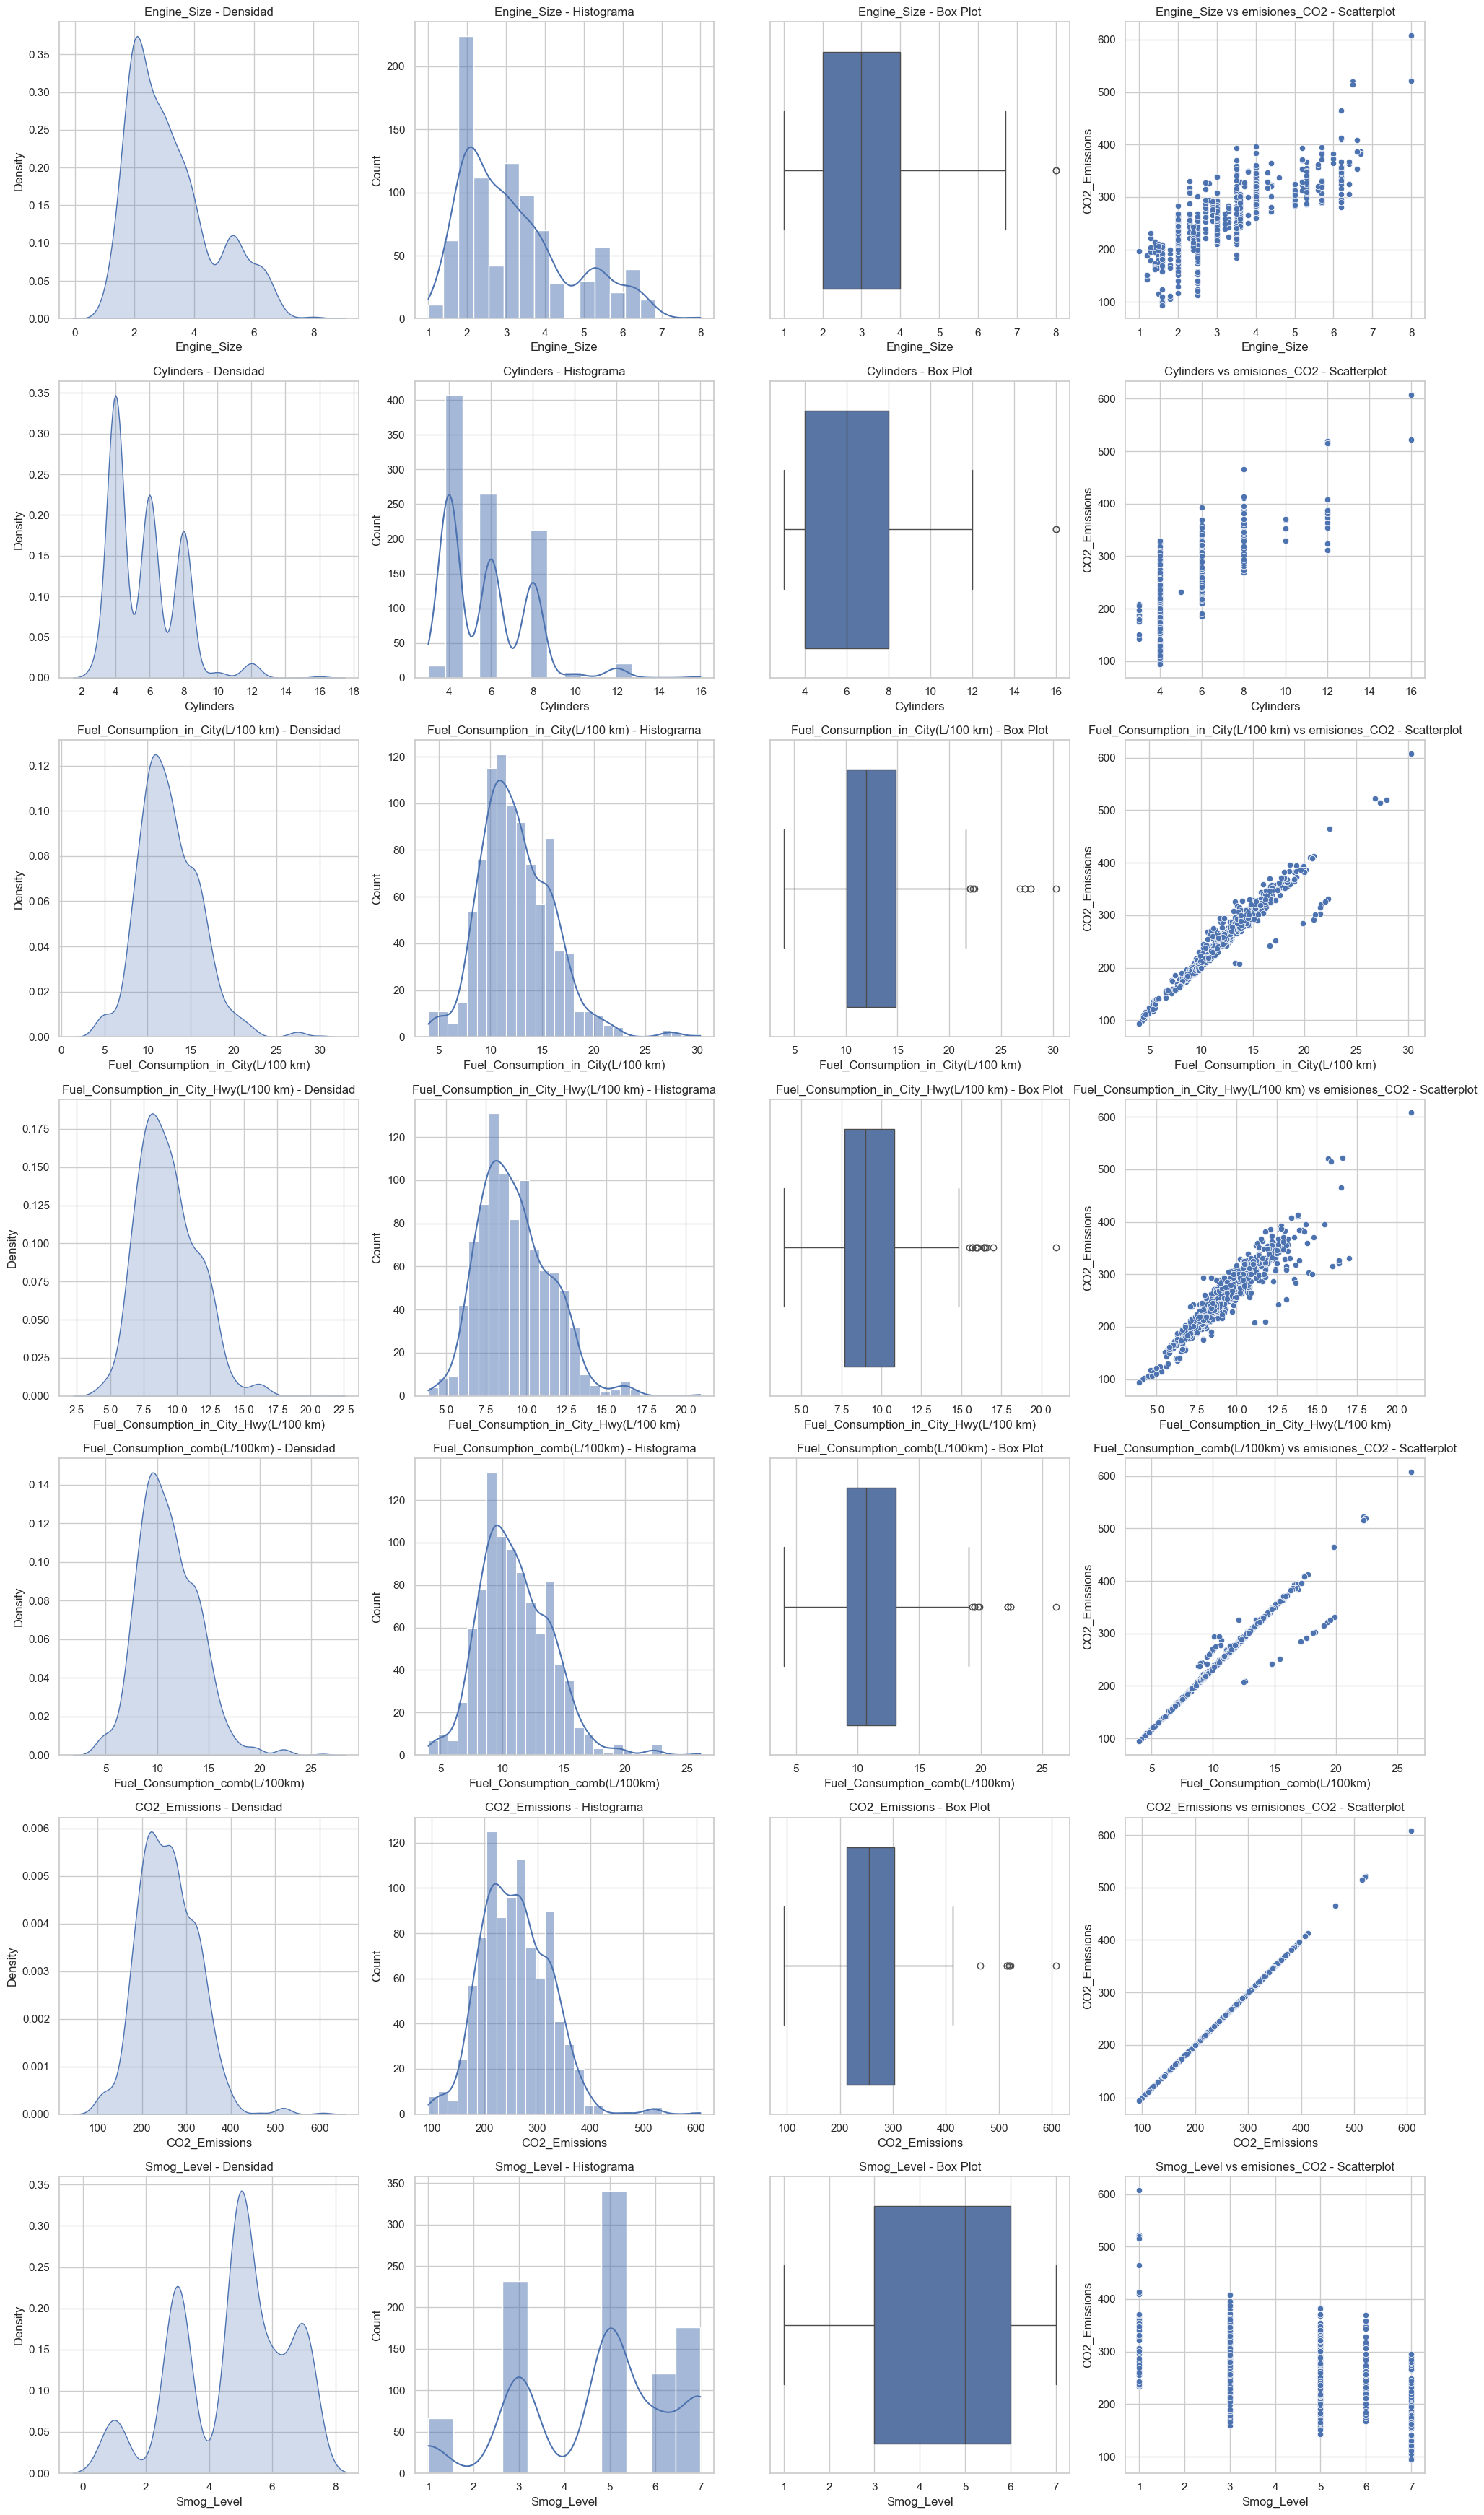

In [35]:
import warnings
warnings.filterwarnings('ignore')
# Presentación gráfica de las variables númericas

sns.set(style="whitegrid")
num_cols = len(df_numerico.columns)

fig, axes = plt.subplots(num_cols, 4, figsize=(20, 5 * num_cols))

for idx, column in enumerate(df_numerico.columns):
    # Densidad
    sns.kdeplot(df_numerico[column], ax=axes[idx, 0], shade=True)
    axes[idx, 0].set_title(f'{column} - Densidad')
    
    # Histograma
    sns.histplot(df_numerico[column], ax=axes[idx, 1], kde=True)
    axes[idx, 1].set_title(f'{column} - Histograma')
    
    # Boxplot
    sns.boxplot(x=df_numerico[column], ax=axes[idx, 2])
    axes[idx, 2].set_title(f'{column} - Box Plot')
    
    # Scatterplot vs emisiones de CO2
    sns.scatterplot(x=df_numerico[column], y=df_numerico['CO2_Emissions'], ax=axes[idx, 3])
    axes[idx, 3].set_title(f'{column} vs emisiones_CO2 - Scatterplot')

plt.tight_layout()
plt.show()